# 04ISFOV - COMPUTER VISION 

## Object Recognition

Questa esercitazione ha come scopo quello di sperimentare alcune tecniche di riconoscimento di oggetti, attraverso la risoluzione di un problema specifico.<br/>
Ci concentreremo, in particolare, sul riconoscere delle palline da tennis in un ambiente predefinito (come il LABINF). Per far ciò, utilizzeremo alcuni dei concetti e delle tecniche viste a lezione e nelle precedenti esercitazioni di laboratorio, seguendo tre passi. 

## Step 1: Analisi del Problema

L’obiettivo di questa esercitazione, come detto, è quello di riconoscere alcune palline da tennis (fornite) in un luogo predefinito (su un tavolo al LABINF, sul pavimento, o...).
Inizieremo con un riconoscimento basato sulle proprietà fisiche degli oggetti (colore, forma, ecc.). 
Pertanto dovrete: 
 - scegliere un luogo a vostra scelta in cui svolgere il riconoscimento; 
 - decidere come acquisire le immagini contenenti le palline da tennis (tramite flusso video, tramite fotografie, utilizzando immagini recuperate su Internet, ecc.);
 - stabilire quali caratteristiche fisiche/geometriche/... degli oggetti volete tenere in considerazione per il loro riconoscimento; 
 - pensare se e come trattare eventuale rumore o altri artefatti presente nell’immagine acquisita;
 - stabilire qual è il risultato che volete ottenere in termini di numero di oggetti riconosciuti correttamente (e in termini      di falsi negativi/positivi accettabili);
 - abbozzare i passi logici che il vostro algoritmo dovrà eseguire.

## STEP 2: Realizzazione

Utilizzando quanto messo a disposizione da OpenCV, implementare l’algoritmo di riconoscimento delle palline da tennis da voi dettagliato nel passo precedente, segnandovi i tempi di esecuzione dei vari passaggi e visualizzando i risultati intermedi delle varie operazioni.<br/>
Ottenete i risultati sperati? Quanto migliorano/peggiorano i risultati ottenuti se scegliete un sottoinsieme diverso delle caratteristiche fisiche/geometriche/... degli oggetti in questione? Cosa succede se l’immagine acquisita presenta del rumore o non è ben messa a fuoco?

## Pacchetti da importare

In [2]:
%matplotlib inline
%pylab inline 
from ipywidgets import interact
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

Populating the interactive namespace from numpy and matplotlib


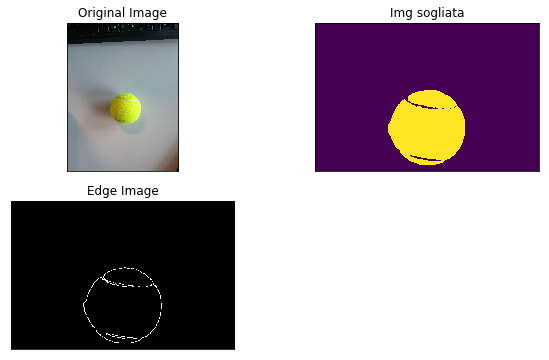

In [7]:
img = cv.imread("images/pallina.jpg")
imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB);
imgHLS = cv.cvtColor(img, cv.COLOR_BGR2HLS);
kernel1 = np.ones((3, 3), np.uint8)
kernel2 = np.ones((2, 2), np.uint8)
imgHLS = cv.GaussianBlur(imgHLS, (11, 11), 0)

"seleziono zone gialle, scegliendo un range di blu perche' nell'immagine HLS la pallina e' blu"
mask_yellow = cv.inRange(imgHLS, np.array([16, 30, 100]), np.array([60, 240, 255]))
" taglio un pezzo dell immagine altezza, larghezza"
ROI = mask_yellow[370:900, 100:900]
edges = cv.Canny(ROI, 100, 200)

#dilatazione
dilation = cv.dilate(edges, kernel1, iterations= 1)
#erosione
IMGerosion = cv.erode(dilation, kernel2, iterations= 1)

plt.rcParams['figure.figsize'] = (10,6)
plt.subplot(221), plt.imshow(imgRGB)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(ROI)
plt.title("Img sogliata"), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(IMGerosion, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show();

## STEP 3: APPROFONDIMENTO 

Provate ora a svolgere lo stesso riconoscimento addestrando un classificatore.<br/>
Cosa cambia, in termini di risultati ottenuti e di tempistiche, rispetto al caso precedente?<br/>
Link utili per addestrare un classificatore:
- https://docs.opencv.org/3.4.5/dc/d88/tutorial_traincascade.html 
- http://coding-robin.de/2013/07/22/train-your-own-opencv-haar-classifier.html 
- http://codeyarns.com/2014/09/01/how-to-train-opencv-cascade-classifier 
- https://docs.opencv.org/3.4.5/d1/d73/tutorial_introduction_to_svm.html 